<a href="https://colab.research.google.com/github/valleyOfPlenty/ML_python/blob/main/TSF_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
# upload this file to drive then import. It will reduce the labor of importing the file each time.

Saving Iris.csv to Iris.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded["Iris.csv"]))

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So, number of clusters = 3. Usually elbow method is used to find the number of clusters, but since this is a fairly known dataset, we can just look at the number of unique target variables and get the number of clusters.

In [ ]:
from sklearn.decomposition import PCA

It is not possible to plot all the features due to the lack of our perception of four dimensions. Since the prime-most requirement of this task is plotting and prediction and it does not instructs us to consider all the features while doing the same, I'll be creating the 2 principal components from the four features which are of utmost importance.

In [ ]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(df.drop('Species', axis = 1))

In [ ]:
iris_pca

array([[ 7.45475269e+01,  4.41425501e-01],
       [ 7.35491434e+01,  3.09342060e-01],
       [ 7.25571205e+01,  8.45275987e-02],
       [ 7.15517906e+01,  1.60353347e-01],
       [ 7.05527631e+01,  2.27636455e-01],
       [ 6.95354479e+01,  6.82532551e-01],
       [ 6.85575899e+01, -2.06900363e-02],
       [ 6.75509913e+01,  1.90728535e-01],
       [ 6.65616547e+01, -2.21321702e-01],
       [ 6.55544836e+01,  3.65310173e-02],
       [ 6.45493236e+01,  2.61818058e-01],
       [ 6.35536129e+01,  1.12428635e-02],
       [ 6.25616417e+01, -2.15782028e-01],
       [ 6.15800901e+01, -7.50369097e-01],
       [ 6.05592753e+01,  4.54831204e-02],
       [ 5.95491857e+01,  2.51717420e-01],
       [ 5.85593354e+01, -9.42719598e-02],
       [ 5.75607105e+01, -2.22884291e-01],
       [ 5.65438233e+01,  2.75209069e-01],
       [ 5.55600537e+01, -2.26573813e-01],
       [ 5.45496505e+01,  2.36456947e-02],
       [ 5.35598142e+01, -2.78669404e-01],
       [ 5.25881927e+01, -1.03189848e+00],
       [ 5.

Here, I tried to innovate something and thought of writing Kmeans from the scratch without importing it. And rather than showing only the final clusters, I thought of representing the whole process of clustering.

In [ ]:
def euclidian_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    def __init__(self, k = 5, max_iters = 100, plot_steps = False):
        self.K = k
        self.iters = max_iters
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []
        self.plot_steps = plot_steps
        
    def predict(self, X):
        
        #In this program we would be requiring X in various helper functions. That's why we made X an attribute of KMeans.
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [X[idx] for idx in random_sample_idxs]
        
        for _ in range(self.iters):
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.is_converged(centroids_old, self.centroids):
                break
        return self._get_cluster_labels(self.clusters)
            
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [euclidian_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids
            
    def is_converged(self, old, new):
        distances = [euclidian_distance(old[i], new[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    def plot(self):
        fig, ax = plt.subplots(figsize = (12, 8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker = 'x', color = 'black', linewidth = 2)
        plt.show()

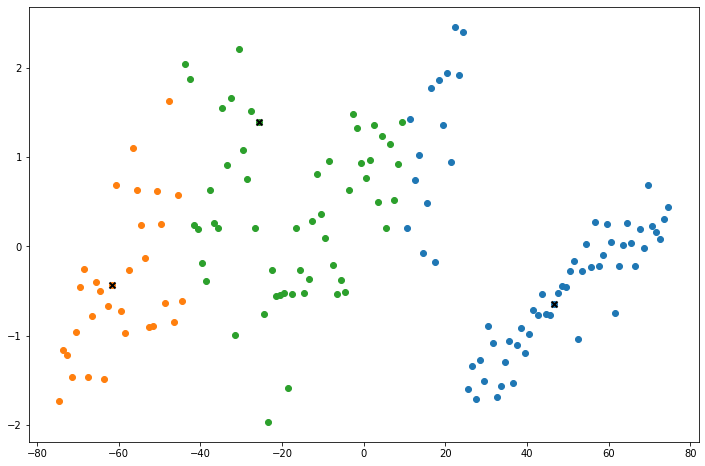

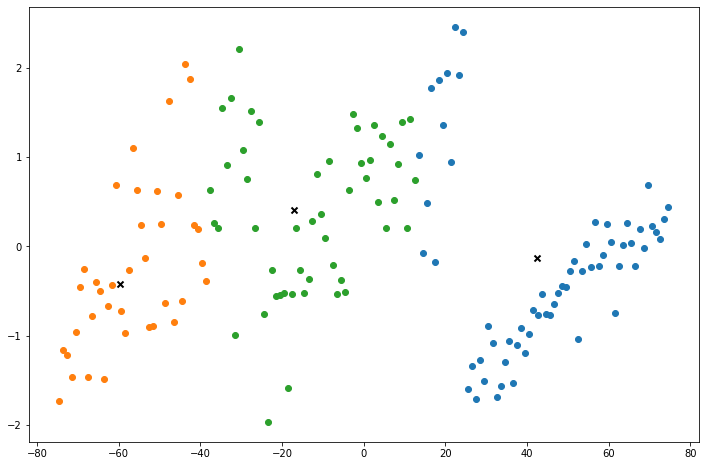

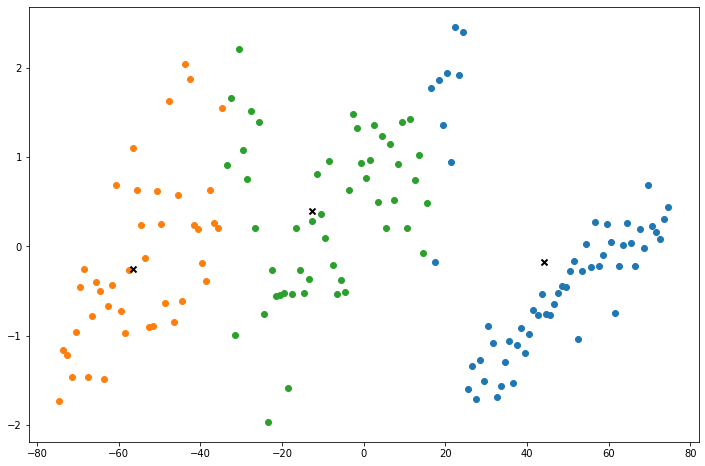

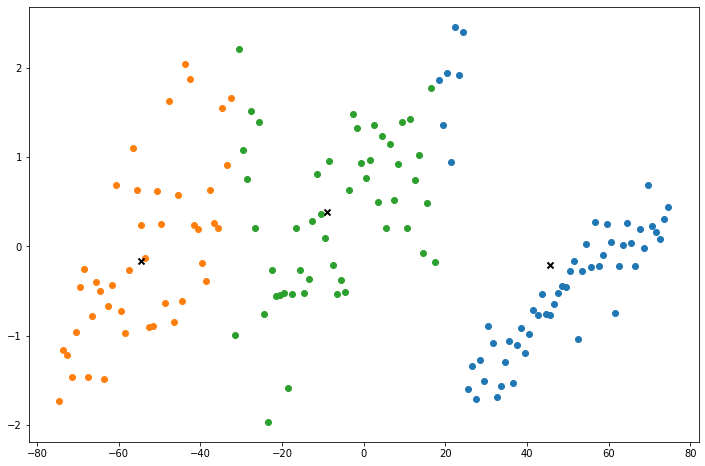

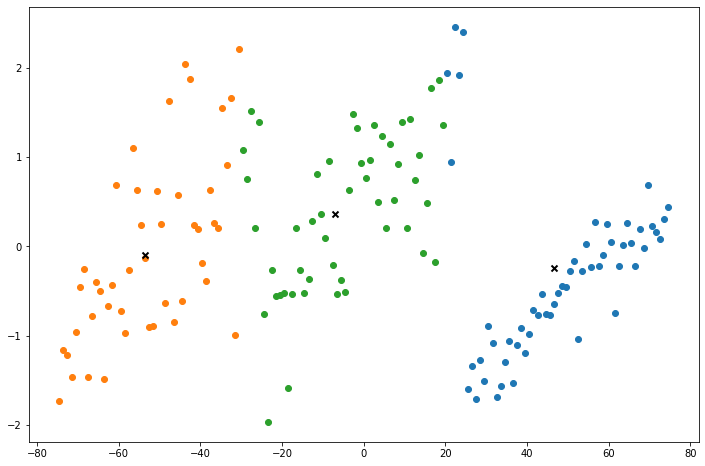

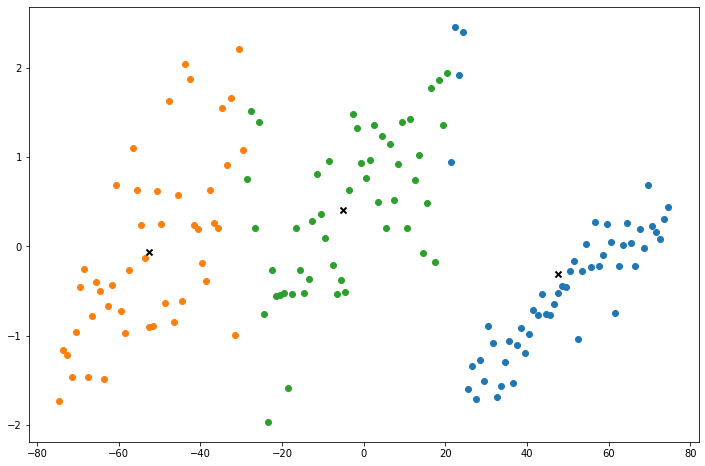

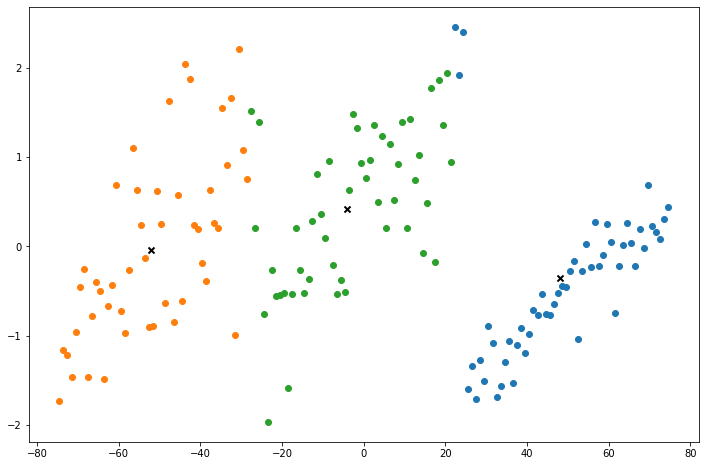

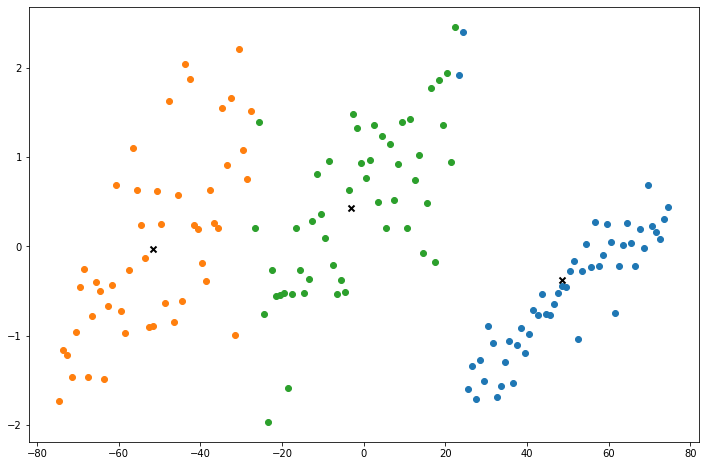

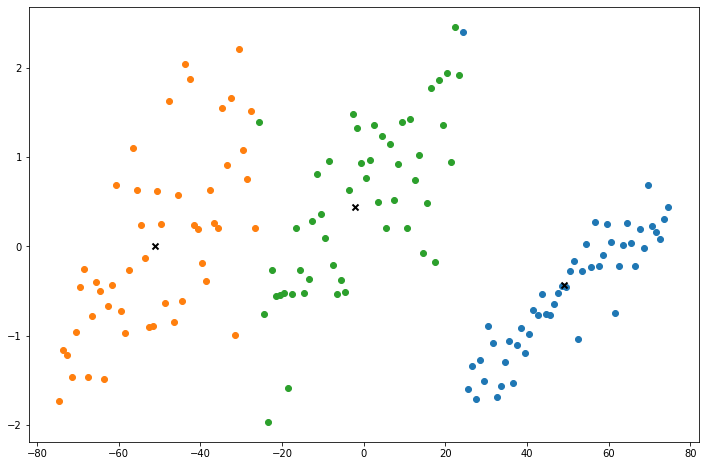

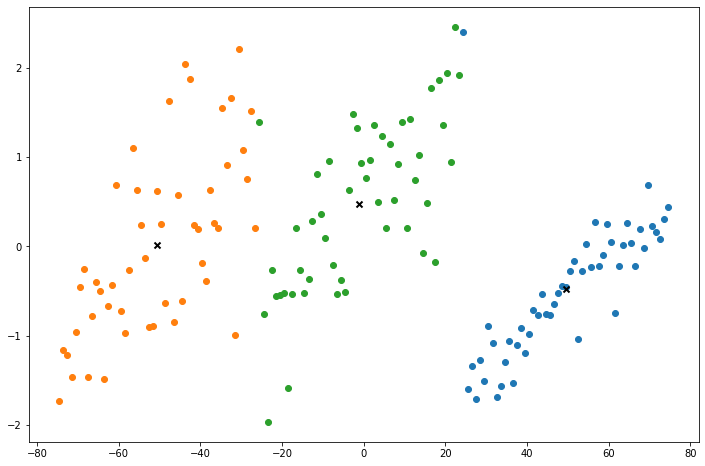

In [ ]:
k = KMeans(3, 100, plot_steps = True)
y_pred = k.predict(iris_pca)